<a href="https://colab.research.google.com/github/omarfathyz8/GTC-Ecommerce-Recommendation-Engine/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r"/content/Reviews.csv")
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


# شرح الأعمدة في الداتا

| العمود | الوصف | أهميته في التوصية |
|--------|-------|--------------------|
| **Id** | رقم تسلسلي للصف (index) | غير مهم، ممكن يتشال |
| **ProductId** | الـ ID الخاص بالمنتج | أساسي (بنعرف المنتج) |
| **UserId** | الـ ID الخاص بالمستخدم | أساسي (بنعرف المستخدم) |
| **ProfileName** | اسم المستخدم (username) | ثانوي (مش دقيق زي UserId) |
| **HelpfulnessNumerator** | عدد الأشخاص اللي لقوا الريفيو مفيد | ممكن تستخدمه لوزن التقييمات |
| **HelpfulnessDenominator** | العدد الكلي للي قيموا الريفيو (مفيد/مش مفيد) | مع الـ Numerator تقدر تحسب نسبة فائدة الريفيو |
| **Score** | التقييم اللي المستخدم أداه (عادة من 1–5) | أهم عمود (اللي هيتبني عليه نظام التوصية) |
| **Time** | وقت كتابة الريفيو (Unix Timestamp) | مفيد لو عاوز تدي وزن أكبر للتقييمات الحديثة |
| **Summary** | عنوان قصير للريفيو (مثال: *Great product!*) | مفيد للـ NLP لكن مش أساسي |
| **Text** | نص الريفيو اللي كتبه المستخدم | مهم جدًا لو هتضيف تحليل مشاعر (Sentiment Analysis) أو NLP |


In [ ]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
df=df.dropna().copy()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Time"]=pd.to_datetime(df["Time"],unit='s')
df["year"]=df["Time"].dt.year
df["month"]=df["Time"].dt.month
df["day"]=df["Time"].dt.day
df.drop("Time",axis=1,inplace=True)

In [ ]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,year,month,day
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011,4,27
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012,9,7
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,2008,8,18
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,2011,6,13
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...,2012,10,21
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,Will not do without,Great for sesame chicken..this is a good if no...,2011,3,9
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,disappointed,I'm disappointed with the flavor. The chocolat...,2012,3,9
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012,2,21
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012,3,13


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("wordnet")
stop=set(stopwords.words("english"))
lemmatizer=WordNetLemmatizer()

def clean_text(text):
    text=text.lower()
    text=re.sub(r'[^a-z\s]', '', text)
    words=[word for word in text.split() if word not in stop]
    words=[lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

df["Text_clean"]=df["Text"].apply(clean_text)
df["Summary_clean"]=df["Summary"].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nice\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nice\AppData\Roaming\nltk_data...


In [ ]:
df=df.drop(columns=["Text","Summary","Id","ProfileName"],axis=1).copy()

In [ ]:
df.to_csv(r"/content/Clean_Reviews.csv")

In [ ]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,year,month,day,Text_clean,Summary_clean
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011,4,27,bought several vitality canned dog food produc...,good quality dog food
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012,9,7,product arrived labeled jumbo salted peanutsth...,advertised
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008,8,18,confection around century light pillowy citrus...,delight say
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011,6,13,looking secret ingredient robitussin believe f...,cough medicine
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012,10,21,great taffy great price wide assortment yummy ...,great taffy
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011,3,9,great sesame chickenthis good better resturant...,without
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012,3,9,im disappointed flavor chocolate note especial...,disappointed
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012,2,21,star small give one training session tried tra...,perfect maltipoo
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012,3,13,best treat training rewarding dog good groomin...,favorite training reward treat


In [ ]:
df

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,year,month,day,Text_clean,Summary_clean
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011,4,27,bought several vitality canned dog food produc...,good quality dog food
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012,9,7,product arrived labeled jumbo salted peanutsth...,advertised
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008,8,18,confection around century light pillowy citrus...,delight say
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011,6,13,looking secret ingredient robitussin believe f...,cough medicine
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012,10,21,great taffy great price wide assortment yummy ...,great taffy
...,...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,0,0,5,2011,3,9,great sesame chickenthis good better resturant...,without
568450,B003S1WTCU,A3I8AFVPEE8KI5,0,0,2,2012,3,9,im disappointed flavor chocolate note especial...,disappointed
568451,B004I613EE,A121AA1GQV751Z,2,2,5,2012,2,21,star small give one training session tried tra...,perfect maltipoo
568452,B004I613EE,A3IBEVCTXKNOH,1,1,5,2012,3,13,best treat training rewarding dog good groomin...,favorite training reward treat


Text(0, 0.5, 'Count')

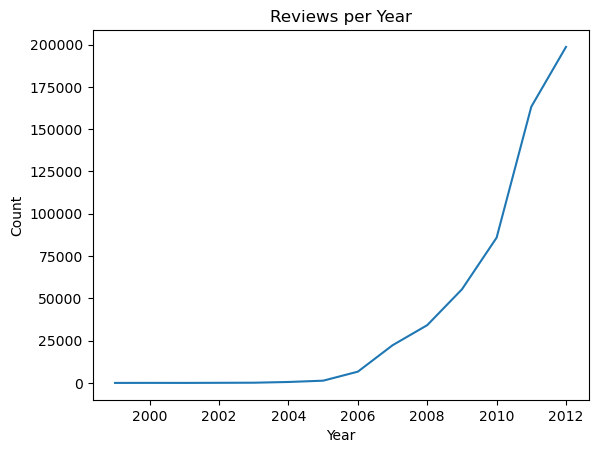

In [ ]:
df['year'].value_counts().sort_index().plot(kind='line')
plt.title("Reviews per Year")
plt.xlabel("Year")
plt.ylabel("Count")

([<matplotlib.patches.Wedge at 0x2a24949da60>,
 [Text(-0.2849539969382744, -1.0624505727933427, '5'),
  Text(0.8953704757995653, 0.6389927316225594, '4'),
  Text(0.23609204253411373, 1.0743651834697876, '1'),
  Text(-0.3336972062359042, 1.048163238503599, '3'),
  Text(-0.7155753597910405, 0.8354351587405949, '2')],
 [Text(-0.1554294528754224, -0.5795184942509142, '63.9%'),
  Text(0.48838389589067194, 0.3485414899759415, '14.2%'),
  Text(0.1287774777458802, 0.5860173728017023, '9.2%'),
  Text(-0.18201665794685684, 0.5717254028201448, '7.5%'),
  Text(-0.3903138326132948, 0.4556919047675972, '5.2%')])

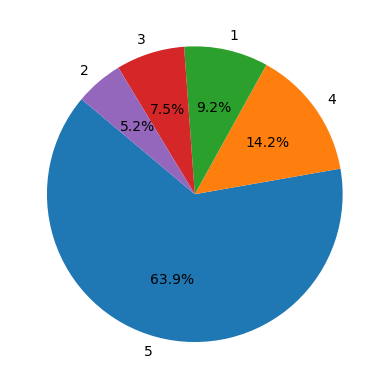

In [ ]:
plt.pie(df["Score"].value_counts(), labels=df['Score'].value_counts().index, autopct='%1.1f%%', startangle=140)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'A3OXHLG6DIBRW8'),
  Text(1, 0, 'A1YUL9PCJR3JTY'),
  Text(2, 0, 'AY12DBB0U420B'),
  Text(3, 0, 'A281NPSIMI1C2R'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A1TMAVN4CEM8U8'),
  Text(6, 0, 'A2MUGFV2TDQ47K'),
  Text(7, 0, 'A3TVZM3ZIXG8YW'),
  Text(8, 0, 'A3PJZ8TU8FDQ1K'),
  Text(9, 0, 'AQQLWCMRNDFGI')])

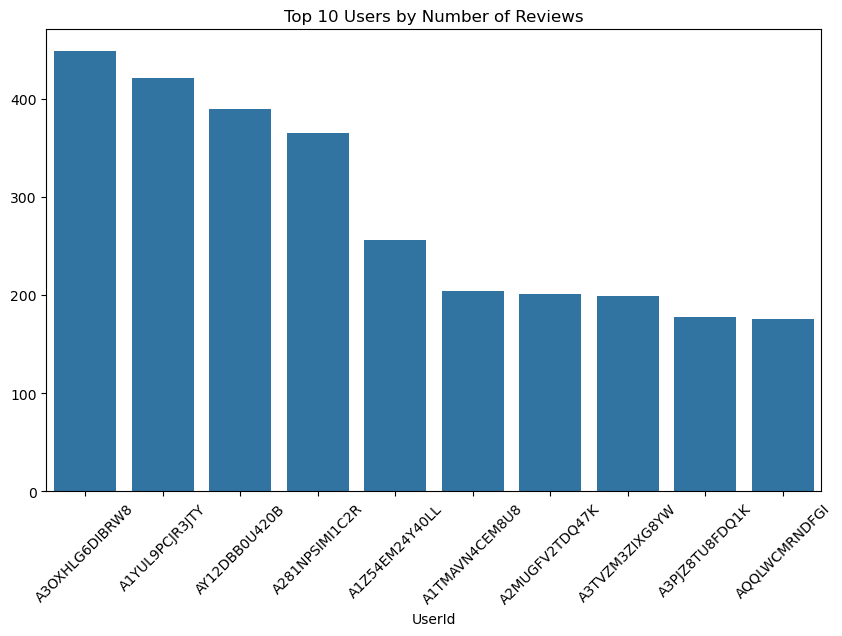

In [ ]:
top_users = df['UserId'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_users.index, y=top_users.values,)
plt.title('Top 10 Users by Number of Reviews')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'B007JFMH8M'),
  Text(1, 0, 'B0026RQTGE'),
  Text(2, 0, 'B002QWP89S'),
  Text(3, 0, 'B002QWHJOU'),
  Text(4, 0, 'B002QWP8H0'),
  Text(5, 0, 'B003B3OOPA'),
  Text(6, 0, 'B001EO5Q64'),
  Text(7, 0, 'B000VK8AVK'),
  Text(8, 0, 'B0026KNQSA'),
  Text(9, 0, 'B0026KPDG8')])

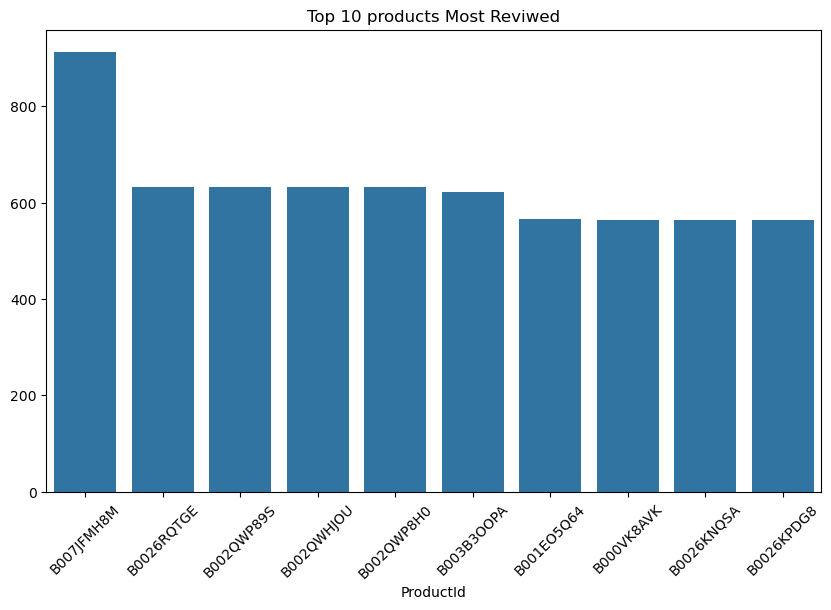

In [ ]:
top_users = df["ProductId"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_users.index, y=top_users.values,)
plt.title('Top 10 products Most Reviwed')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Average Score by year')

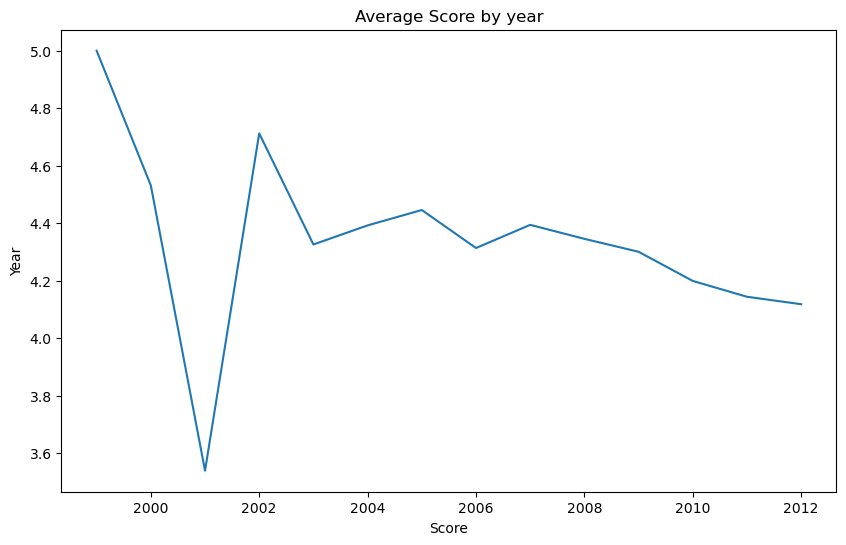

In [ ]:
plt.figure(figsize=(10,6))
df.groupby("year")["Score"].mean().plot(kind="line")
plt.ylabel("Year")
plt.xlabel("Score")
plt.title("Average Score by year")
